### Phân tích cú pháp: Bài thực hành trên lớp 

Bài 2: chương trình minh hoạ kiểm lỗi cú pháp tiếng Anh đơn giản 

1) Cài đặt thư viện liên quan
    
    - Cài đặt thư viện Stanford NLPCore
    
    Yêu cầu có cài đặt Java SDK vì bộ thư viện Stanford NLPCore code Java, file chạy .jar

    - import bộ phân tích cú pháp CoreNLPParser 

2)  Phân tích cú pháp cho câu và khảo sát  cây cú pháp

a) gọi phân tích cú pháp

b) view cây 

3) Qui tắc kiểm lỗi cú pháp

-	Ví dụ về Qui tắc agreement giữa Subject – Verb

-	Kiểm lỗi và đưa ra loại lỗi 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Đường dẫn tải Stanford-corenlp-4.2.0
url = "https://drive.google.com/drive/folders/1zF3FcyQOoY2PgM_86cwIMp9AsReTcyL6?usp=sharing"

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!apt install ghostscript python3-tk
from ctypes.util import find_library
print(find_library("gs")) #will display libgs.so.9 if installed; will print None if not
!excalibur initdb

In [ ]:
import os

#Set up môi trường cho corenlp  đường dẫn bên dưới đến thư mục "stanford-corenlp-4.2.0"
from nltk.parse.corenlp import CoreNLPServer
STANFORD = os.path.join("/content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5", "stanford-corenlp-4.2.2")
print(STANFORD)
#  Giải nén và loadmodel
model = CoreNLPServer(
   os.path.join(STANFORD, "stanford-corenlp-4.2.2.jar"),
   os.path.join(STANFORD, "stanford-corenlp-4.2.2-models.jar"), 
   verbose=True,
   port=9001
)
# Start the model CoreNLPServer
#model.start() not support on 4.2.0

/content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5/stanford-corenlp-4.2.2


In [ ]:
%cd /content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5/stanford-corenlp-4.2.2
!nohup java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 15000 > core-server.log&


/content/drive/MyDrive/NLP/Đáp án cho bài tập thực hành/Lesson5/stanford-corenlp-4.2.2
nohup: redirecting stderr to stdout


In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.2 MB/s 


In [ ]:
from nltk.tree import Tree
from nltk.parse.corenlp import CoreNLPParser

(ROOT
  (S
    (NP (PRP$ my) (JJ english) (NN instructor))
    (VP (VBD were) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))
                        ROOT                         
                         |                            
                         S                           
         ________________|_________________________   
        |                         VP               | 
        |                 ________|___             |  
        NP               |            NP           | 
  ______|________        |     _______|______      |  
PRP$    JJ       NN     VBD   DT      JJ     NN    . 
 |      |        |       |    |       |      |     |  
 my  english instructor were  a      good teacher  . 



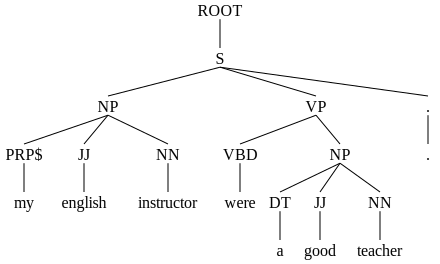

In [ ]:
import matplotlib
matplotlib.use('Agg')

def parse_processing(string):
    #Tạo parse tree
    parser = CoreNLPParser(url='http://localhost:9001')
    parse = next(parser.raw_parse(string))
    
    #Định dạng kiểu cho parse tree
    tree = Tree.fromstring(str(parse), 
               read_node=lambda s: "%s" % s, # xuất node
               read_leaf=lambda s: "%s" % s.lower()) # xuất lá
    return tree

string = "My English Instructor were a good teacher."
## In cây
##START CODE HERE

##END CODE HERE

In [ ]:
print(tree.leaves())
for child in tree:
    print(child.label())

['my', 'english', 'instructor', 'were', 'a', 'good', 'teacher', '.']
S


In [ ]:
# phân tích dependency parsing 
from nltk.parse.corenlp import CoreNLPDependencyParser

In [ ]:
#string = 'I put the book in the box on the table.'
string = 'I have booked a very nice hotel.'
parser = CoreNLPDependencyParser(url='http://localhost:9001')
parse = next(parser.raw_parse(string))

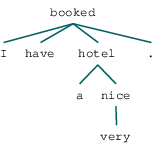

In [ ]:
parse.tree()

In [ ]:
#sent = 'she love a teacher very much '
#sent = 'actually her friend loves the teacher very much '
#sent = 'she loves'
#sent = 'actually she loves the teacher very much '
#sent = 'she want to teach this lecture'
sent = 'I love you'
def parse(sent):
    sent = sent.lower()
    tree = parse_processing(sent)
    return tree

tree = parse(sent)
print(len(tree[0]))
tree.pretty_print()

2
    ROOT        
     |           
     S          
  ___|____       
 |        VP    
 |    ____|___   
 NP  |        NP
 |   |        |  
PRP VBP      PRP
 |   |        |  
 i  love     you



In [ ]:
#In cây con NP_VP
def getNP_VP(tree):
    for i in range(len(tree[0])-1):
        if tree[0][i].label()=='NP' and tree[0][i+1].label()=='VP':
            return tree[0][i], tree[0][i+1]
    return 0,0

In [ ]:
NP,VP = getNP_VP(tree)
NP.pretty_print()
VP.pretty_print()

 NP
 |  
PRP
 |  
 i 

      VP    
  ____|___   
 |        NP
 |        |  
VBP      PRP
 |        |  
love     you



In [ ]:
# xác định ngôi của chủ ngữ
'''
1:  Ngôi thứ nhất số ít: I
2:  Ngôi thứ nhất số nhiều: we
3:  Ngôi thứ 2: you 
4:  Ngôi thứ 3 số ít: he, she, it
5:  Ngôi thứ 3 số nhiều: they 
-1: không xác định (cấu trúc câu không có chủ ngữ)
'''
# Lấy thông tin chủ ngữ
def get_subject_type(node):
    words = node.leaves()
    ##START CODE HERE
 
    ##END CODE HERE
print(get_subject_type(NP))

1


In [ ]:
# lấy type của verb
'''
1: VB: Verb, base form
2: VBP: Verb, non-3rd person singular present
3: VBZ: Verb, 3rd person singular present
4: VBD: Verb, past tense
5: VBG: Verb, gerund or present participle
6: VBN: Verb, past participle
'''

vdict={'VB':1, 'VBP':2,'VBZ':3,'VBD':4,'VBG':5,'VBN':6}
def get_verb_type(node):
    ##START CODE HERE

    ##END CODE HERE

In [ ]:
VP.pretty_print()
get_verb_type(VP)

      VP    
  ____|___   
 |        NP
 |        |  
VBP      PRP
 |        |  
love     you



2

In [ ]:
# xác định nguyên tắc lỗi
'''
NP:4 -> VP:3
'''
match={1:[2],4:[3]}
def check_grammar(sent):
    ##START CODE HERE

    return 'ok'
    ##END CODE HERE

In [ ]:
#sent = 'she want to go to school'
sent = 'she wants to go to school'
check_grammar(sent)

'ok'